In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = '1'
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Real-estate1.csv")

In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

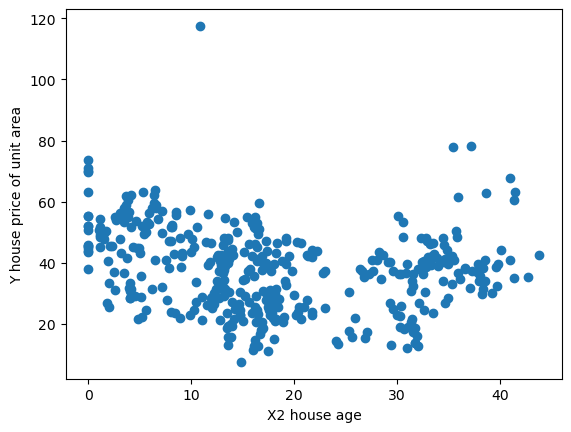

In [7]:
plt.scatter(df['X2 house age'],df['Y house price of unit area'])
plt.xlabel("X2 house age")
plt.ylabel("Y house price of unit area")
plt.show()

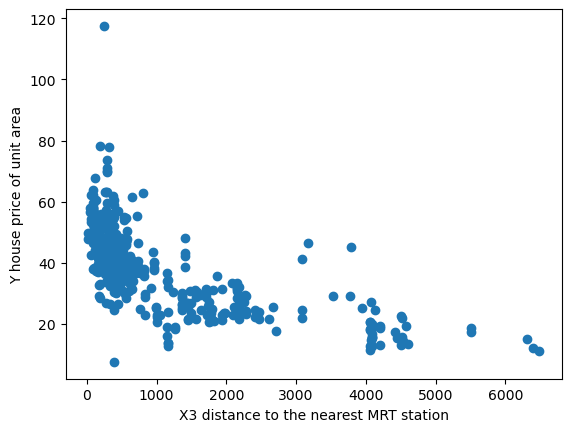

In [8]:
plt.scatter(df['X3 distance to the nearest MRT station'],df['Y house price of unit area'])
plt.xlabel("X3 distance to the nearest MRT station")
plt.ylabel("Y house price of unit area")
plt.show()

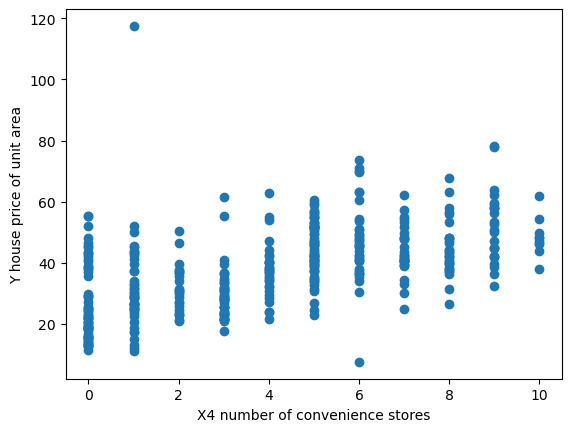

In [9]:
plt.scatter(df['X4 number of convenience stores'],df['Y house price of unit area'])
plt.xlabel("X4 number of convenience stores")
plt.ylabel("Y house price of unit area")
plt.show()

In [10]:
relevant_cols = ["No", "X2 house age", 
                 "Y house price of unit area"]

estate_df = df[relevant_cols]

In [11]:
estate_df

,No,X2 house age,Y house price of unit area
0,1,32.0,37.9
1,2,19.5,42.2
2,3,13.3,47.3
3,4,13.3,54.8
4,5,5.0,43.1
...,...,...,...
409,410,13.7,15.4
410,411,5.6,50.0
411,412,18.8,40.6
412,413,8.1,52.5


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(estate_df)


StandardScaler()

In [13]:
scaled_data = scaler.transform(estate_df)
scaled_data

array([[-1.72787215,  1.25562833, -0.00590088],
       [-1.71950473,  0.15708622,  0.3105072 ],
       [-1.71113731, -0.38779067,  0.6857819 ],
       ...,
       [ 1.71113731,  0.09556786,  0.19277396],
       [ 1.71950473, -0.84478419,  1.06841493],
       [ 1.72787215, -0.98539758,  1.90726426]])

In [14]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [15]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

C:\Users\MGMCE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MGMCE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MGMCE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MGMCE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [16]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

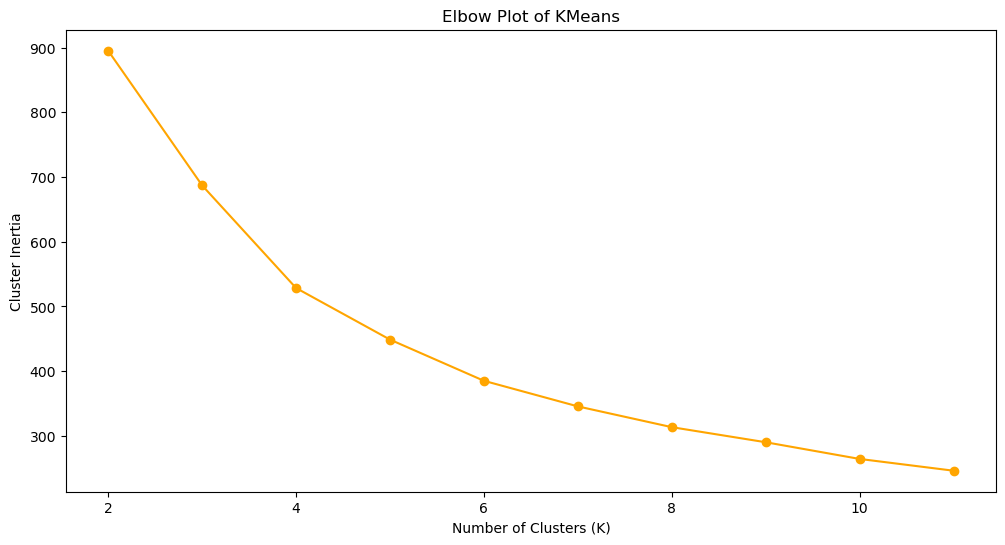

In [17]:
generate_elbow_plot(clusters_centers, k_values)

In [18]:
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(scaled_data)

C:\Users\MGMCE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [19]:
df["clusters"] = kmeans_model.labels_

In [20]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,clusters
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,0
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,0
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,0


Text(0, 0.5, 'Y house price of unit area')

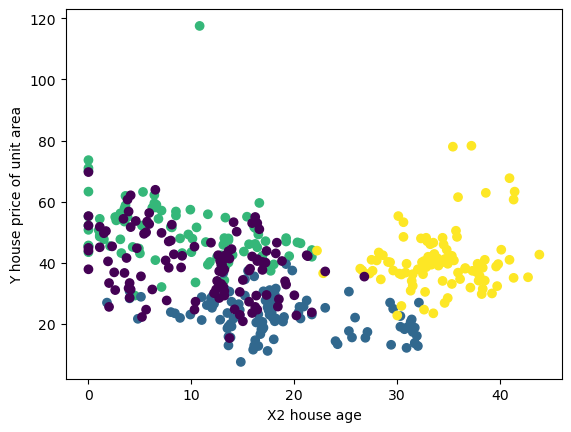

In [21]:
plt.scatter(df["X2 house age"],
            df["Y house price of unit area"], 
            c = df["clusters"])
plt.xlabel("X2 house age")
plt.ylabel("Y house price of unit area")